# Datenerfassung und Auswertung
## eines Smart-Home Systems auf Basis von Philips Hue

### Medthodendefinition

In [62]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mlp
import datetime as dt
from datetime import *
from matplotlib.pyplot import figure
import pandas as pd
import json
import glob

startdate = dt.datetime(2022,1,7,0,0,0)
state_name = ''

def set_state_name(newname):
    state_name = newname

"""
To read documents within a folder and map the data in a list

:param folder: folder from which the data should be read
:returns: list of data contained in the documents
"""
def read_files(folder):
    data = []
    
    # load json-files into dictionary
    files = glob.glob(folder + '/*', recursive=True)
    
    # iterate through the file list
    for single_file in files:
        with open(single_file, 'r') as file:
            try:
                json_file = json.load(file)
                for entry in json_file:
                    # load data from the files into a list
                    data.append(entry)
            except KeyError:
                  print('Skipping {single_file}', file)
    return data



        
"""
Extracts the dates and the state information from the existing data

:param data: available data
:param state: days to be added to today's date
:param start: start day for data extraction
:param end: end day for data extraction

:returns: lists of dates and states
"""
def retrive_state_and_date_list(data, state, start = 0 , end = 10):
    state_list = []
    date_list = []
    
    # determine start and end day
    startdate = timespan(start)
    enddate = timespan(end)
    
     # iterate through passed data
    for entry in data:
        date = dt.datetime.strptime(entry['time'], "%d.%m.%Y %H:%M:%S")
        
        # check if time within specified date
        if(startdate < date < enddate):
            
            # append dates and states to according lists
            state_list.append(entry[state])
            date_list.append(date)
            
    return date_list, state_list


"""
Calculates the enddate according to the number of days

:param amount_of_days: days to be added to today's date
:returns: the calculated day
"""
def timespan(amount_of_days):
    return startdate + timedelta(days = amount_of_days)


"""
Output of the data of the passed lists in a diagram

:param date_list: list of all recorded dates
:param state_list: list of all recorded states
"""
def plot_data(date_list, state_list):
    
    # configure diagram
    figure(figsize=(70, 20), dpi=35)
    plt.rcParams.update({'font.size': 35})
    
    # set, configure and format lable
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d.%m.%Y %H:%M:%S"))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gcf().autofmt_xdate()
    plt.xlabel('date')
    plt.ylabel(state_name)

    # create x-y plot
    plt.plot_date(date_list, state_list, 'ro')

    # show a dotted diagram grid
    plt.grid(True)

    # show diagram
    plt.show()

### Temperatursensor

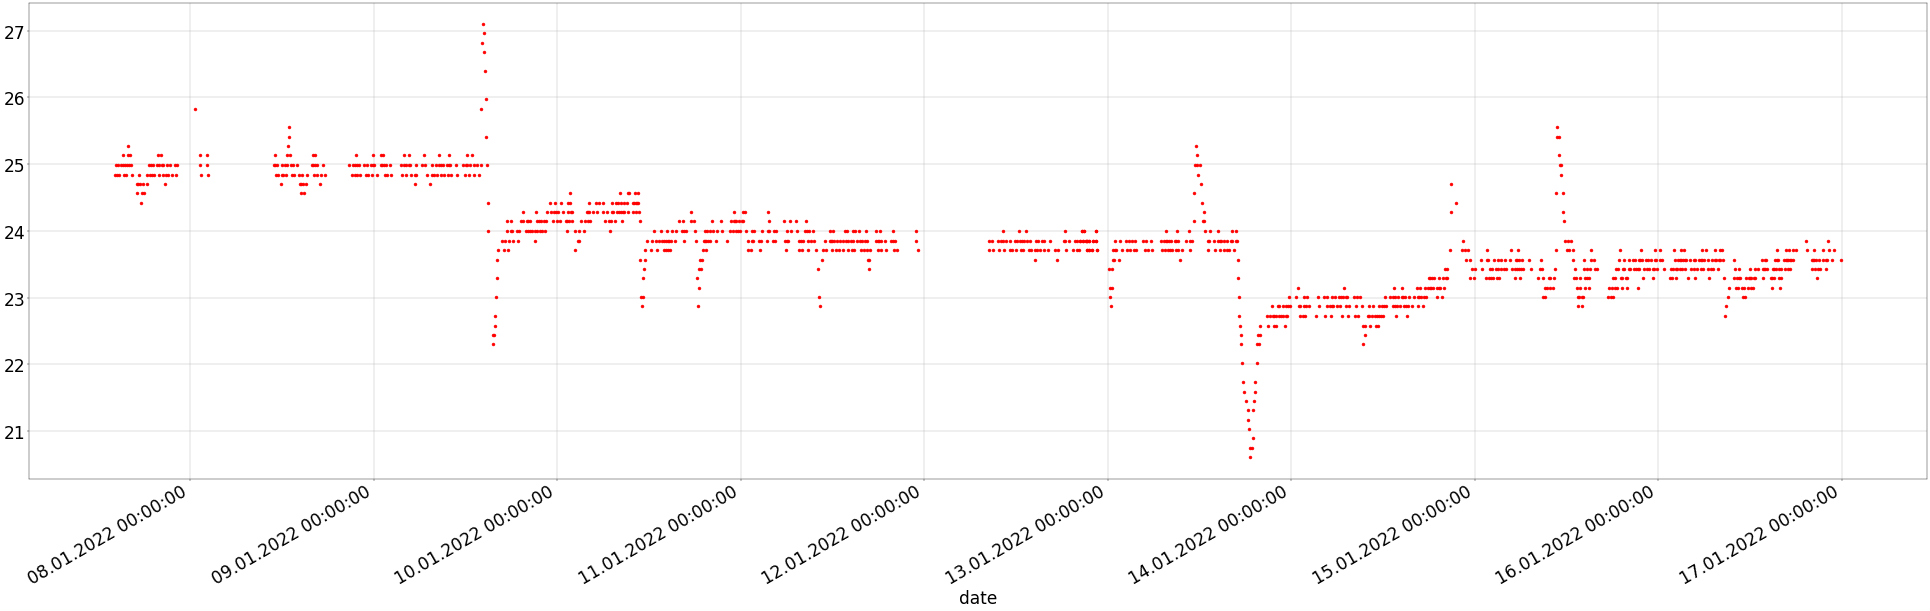

Wie war die Durchschnittstemperatur ?
23.28
Was war die höchste gemessene Temperatur
27.1
Wann wurde die höchste Temperatur gemessen?
2022-01-09 14:13:41
Was war die niedrigste gemessene Temperatur
20.61
Wann wurde die niedrigste Temperatur gemessen?
2022-01-13 18:37:43


In [63]:
set_state_name('temperature')
data = read_files('temperature')
lists = retrive_state_and_date_list(data, 'newState')

date_list = lists[0]
state_list = lists[1]

# adapt temperatur
for idx,state in enumerate(state_list):
    state_list[idx] = int(state)/100
    
plot_data(date_list, state_list)


print('Wie war die Durchschnittstemperatur ?')
sum = 0
for state in state_list:
    sum += int(state)

    average = sum/len(state_list)
print(str(round(average,2)) + "°C")

print('Was war die höchste gemessene Temperatur')
print(str(max(state_list)) + "°C")

print('Wann wurde die höchste Temperatur gemessen?')
for idx,state in enumerate(state_list):
    if(state == max(state_list)):
        print(date_list[idx])        

print('Was war die niedrigste gemessene Temperatur')
print(str(max(state_list)) + "°C")

print('Wann wurde die niedrigste Temperatur gemessen?')
for idx,state in enumerate(state_list):
    if(state == min(state_list)):
        print(date_list[idx])

### Tageslichtsensor

In [64]:
data = read_files('daylight')

#### Lichtleveldaten

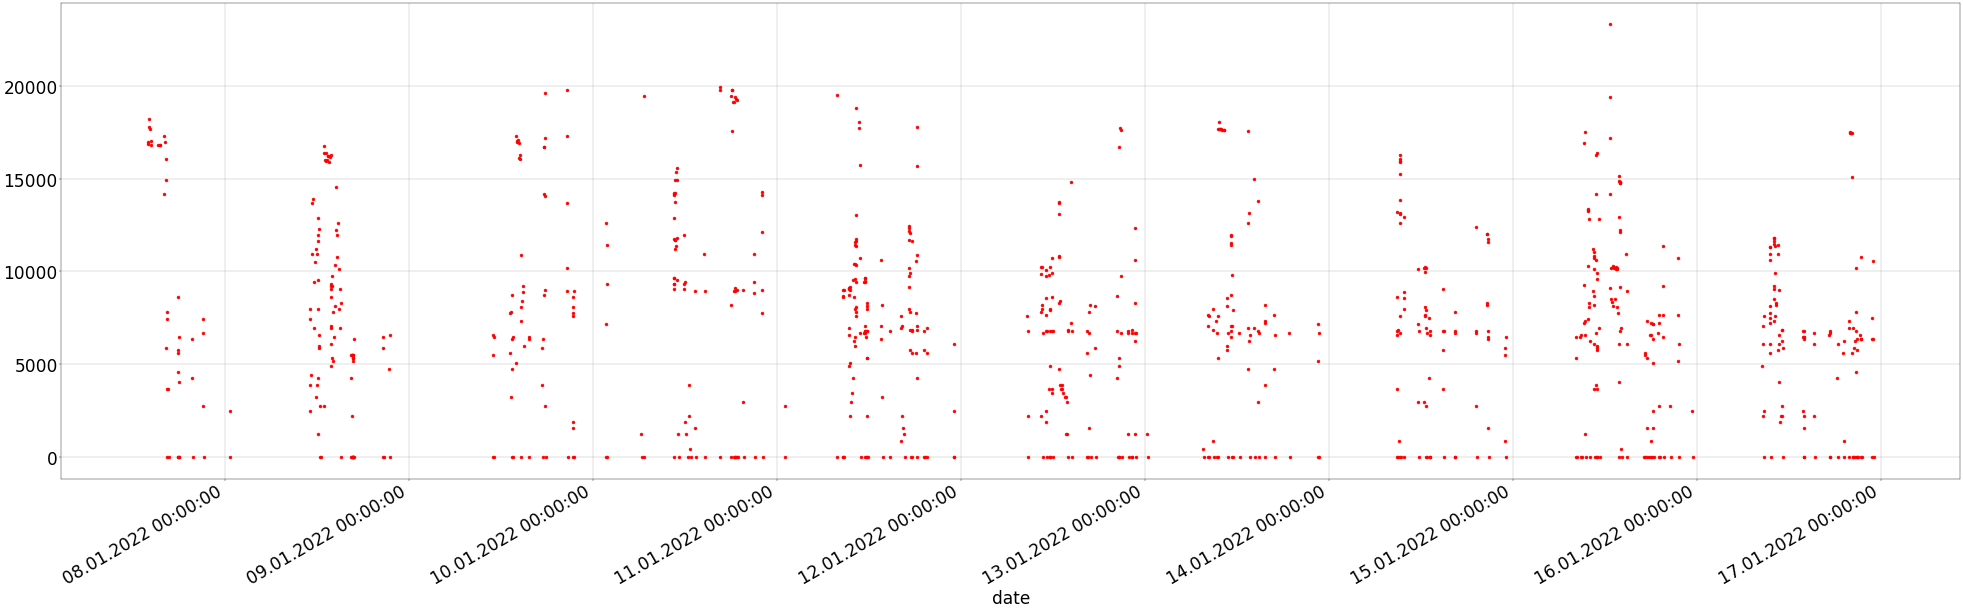

Wie war die Durchschnittslichtstärke?
7077.86
Was war die höchste gemessene Lichtstärke?
23324
Wann wurde die höchste Lichtstärke gemessen?
2022-01-15 12:36:18
Was war die niedrigste gemessene Lichtstärke?
0


In [65]:
set_state_name('lightlevel')
lists = retrive_state_and_date_list(data, 'lightlevel')

date_list = lists[0]
state_list = lists[1]

plot_data(date_list, state_list)


print('Wie war die Durchschnittslichtstärke?')
sum = 0
for state in state_list:
    sum += int(state)

    average = sum/len(state_list)
print(str(round(average,2)) + "lux")

print('Was war die höchste gemessene Lichtstärke?')
print(str(max(state_list)) + "lux")

print('Wann wurde die höchste Lichtstärke gemessen?')
for idx,state in enumerate(state_list):
    if(state == max(state_list)):
        print(date_list[idx])
        

print('Was war die niedrigste gemessene Lichtstärke?')
print(str(min(state_list)) + "lux")

### Methodendefinition II

In [66]:
from collections import OrderedDict
import collections

"""
Generates a dictionary from two lists containing 
the corresponding keys and values and orders them 
according to the keys

:param key_list: list that provides the corresponding keys
:param value_list: ist that provides the corresponding values

:returns: an ordered list
"""
def create_sorted_dict(key_list, value_list):
    dictionary = {}
    
    # iterate over both list and set key and values
    for (date, state) in zip(key_list, value_list):
        dictionary[date] = state
        
    # return ordered list
    return collections.OrderedDict(sorted(dictionary.items()))

"""
Determines the duration of the passed state and the counterpart

:param od: ordered list with
:param check: word after which the light is checked

:returns: Duration of the states within the list
"""
def times(od, check=0):

    val1_time = 0
    val2_time = 0
    new_state = False
    new_time = 0
    
    for idx,key in enumerate(od):
        
        if(type(check) == str):
            od[key] = od[key] == check
        
        if(idx == 0):
            new_state = od[key]
            new_time = key
            continue

        old_time = new_time
        new_time = key

        old_state = new_state
        new_state = od[key]

        # add duration according to state sequence
        if(old_state  and new_state):
            val1_time += measure_timediff(old_time, new_time)
        elif(old_state and not new_state):
            val1_time += measure_timediff(old_time, new_time)
        elif(not old_state and new_state):
            val2_time += measure_timediff(old_time, new_time)
        elif(not old_state and not new_state):
            val2_time += measure_timediff(old_time, new_time)
        else:
            print('undefined')
            
    return round(val1_time,2), round(val2_time,2)

"""
Determination of the time difference between the two passed times

:param old_time: old date of measurement
:param new_time: new date of measurement

:returns: time difference between the two dates
"""
def measure_timediff(old_time, new_time):
    difference = new_time - old_time
    total_in_seconds = difference.total_seconds()
    return total_in_seconds/60/60

"""
Output of a pie chart to show the duration of the occurred states.

:param time_list: list containing the duration of the states
:param labels: labels to indicate the states
"""
def plot_pie(time_list, labels):
    fig = plt.figure(figsize =(20, 15))
    plt.pie(time_list, labels=labels, explode=(0,0.1), autopct='%1.1f%%', labeldistance=1.4)

"""
Output of a pie chart to show the duration of the occurred states.

:param time_list: list containing the duration of the states
:param labels: labels to indicate the states
:param title: title for the diagram
:param xlable: label for the x-axis
:param ylable: label for the y-axis
:param figsize: determines size of the diagram 
"""
def plot_bar(time_list, labels, title='', xlable='', ylable='', figsize = (20, 10)):
    fig = plt.figure(figsize = figsize)
    plt.bar(labels,time_list, color=['blue', 'orange'])
    plt.ylabel(ylable)
    plt.xlabel(xlable)
    plt.title(title)
    plt.show()

### Fortführung Tageslichtsensor

#### Daten zur Dunkelheit

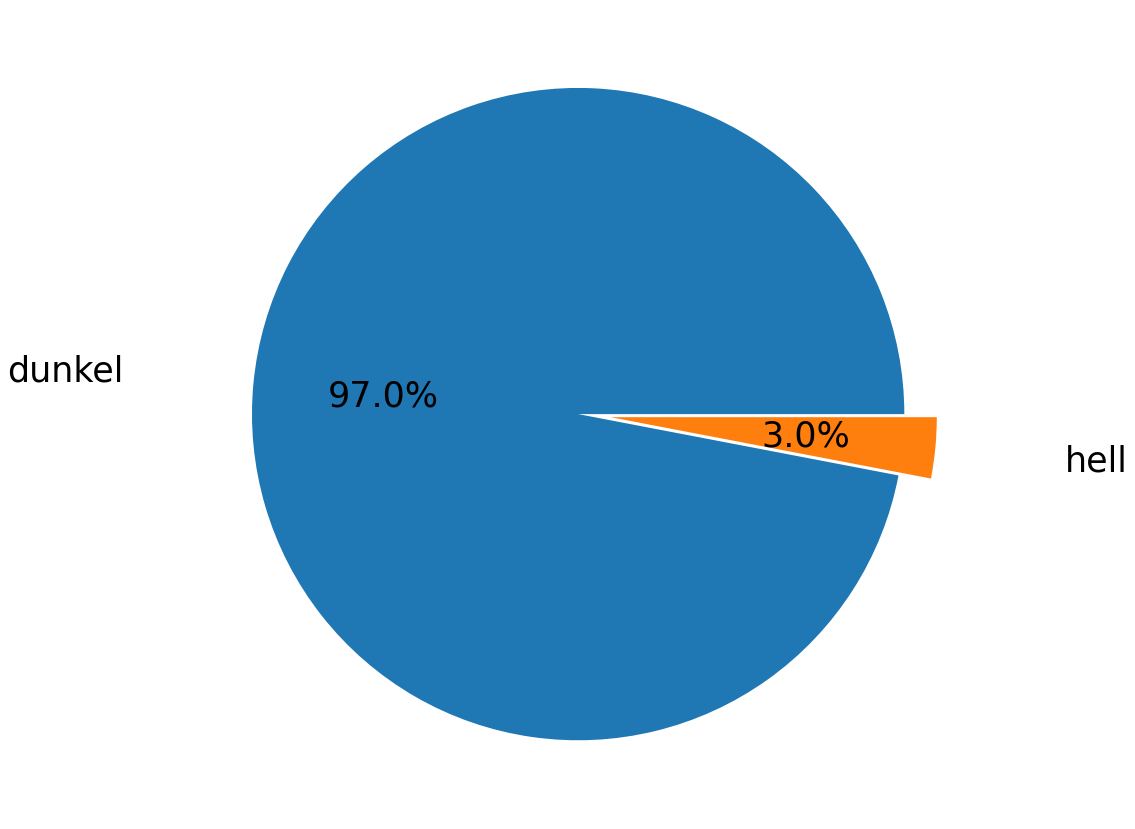

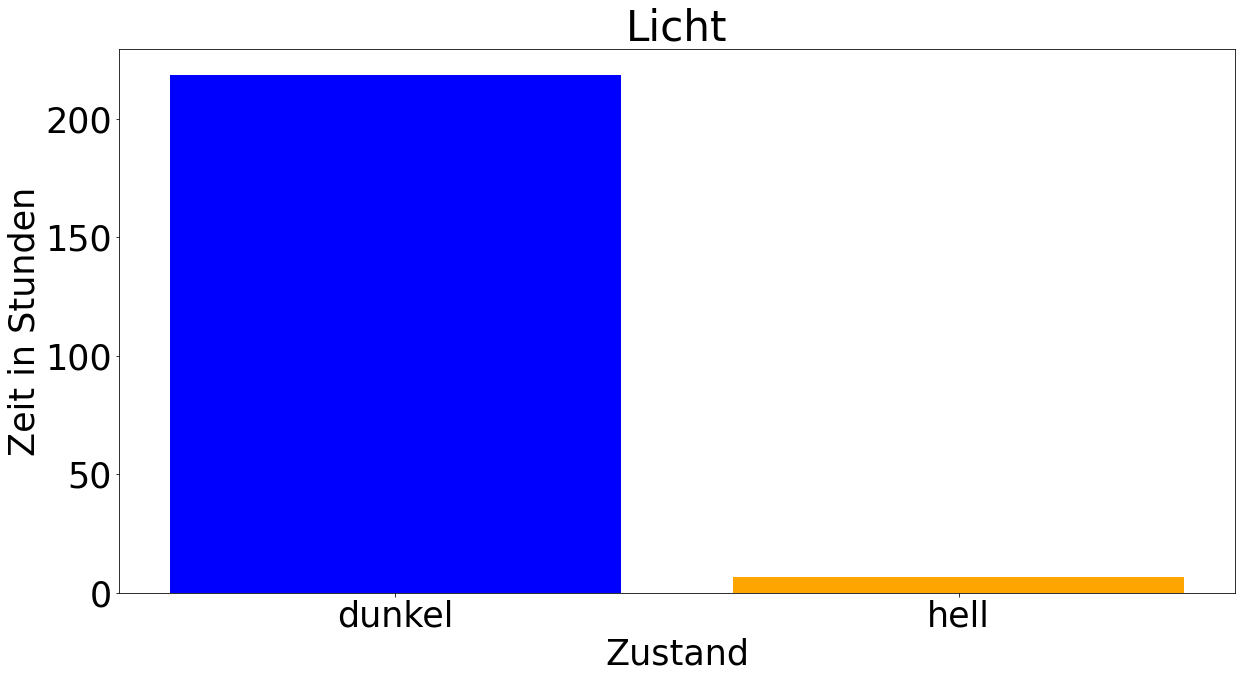

Wie lang war es in der Küche dunkel?
218.34h
Wie lang war es in der Küche hell
6.78h
Wie oft war es in der Küche hell?
0
Wann is es das letzte mal in der dunkel geworden? (gemessen)
2022-01-16 22:59:36


In [67]:
set_state_name('dark')
lists = retrive_state_and_date_list(data, 'dark')
od = create_sorted_dict(lists[0], lists[1])
durations = times(od)
labels = ['dunkel', 'hell']
plot_pie(durations, labels)
plot_bar(durations, labels, 'Licht', 'Zustand', 'Zeit in Stunden')

print('Wie lang war es in der Küche dunkel?')
print(str(round(durations[0],2)) + "h")

print('Wie lang war es in der Küche hell')
print(str(round(durations[1],2)) + "h")

print('Wie oft war es in der Küche hell?')
counter=0
for state in lists[1]:
    if(state == 'present'):
        counter+=1
print(counter)

print('Wann ist es das letzte mal in der Küche dunkel geworden? (gemessen)')
print(list(od)[-1])

#### Daten über zur Verfügung stehendes Tageslicht

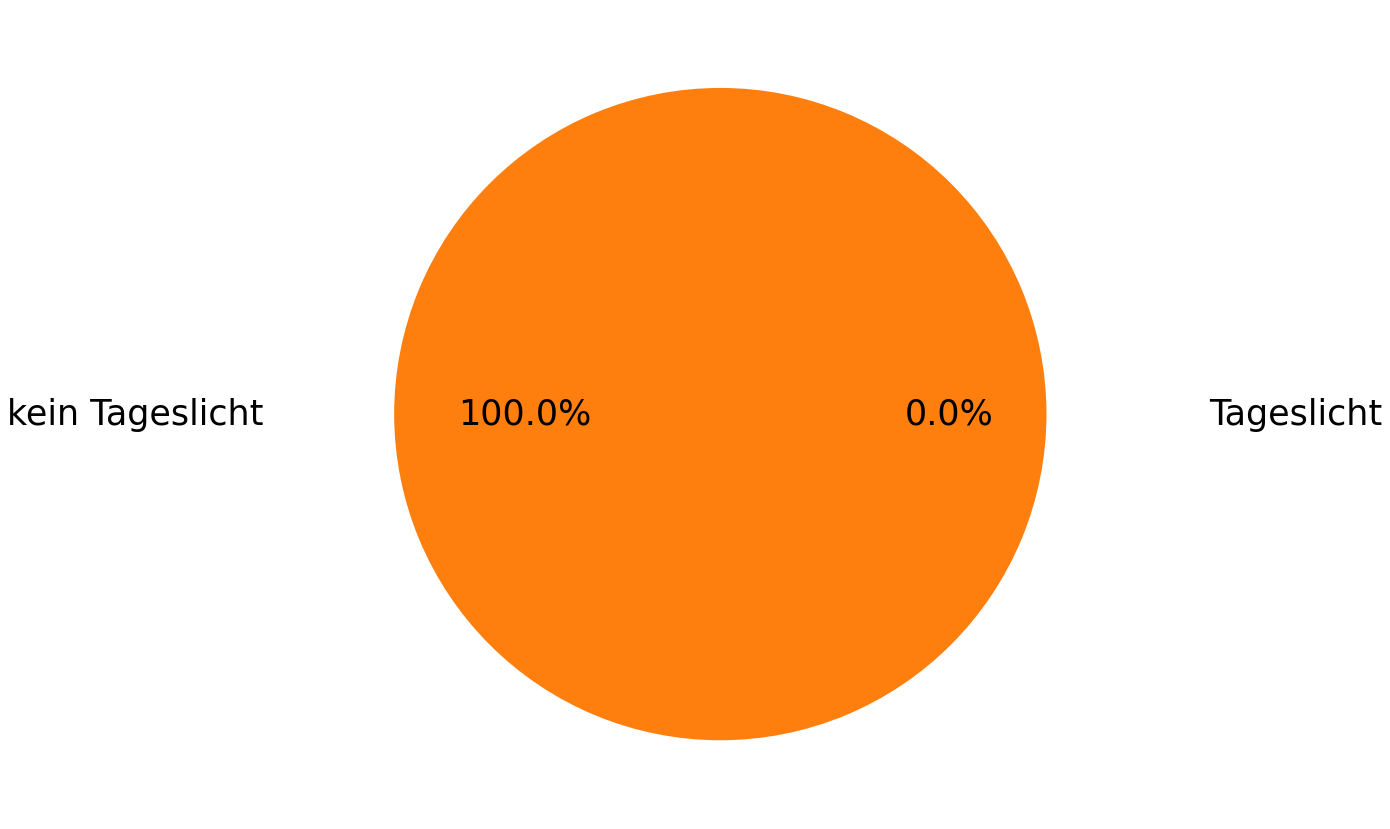

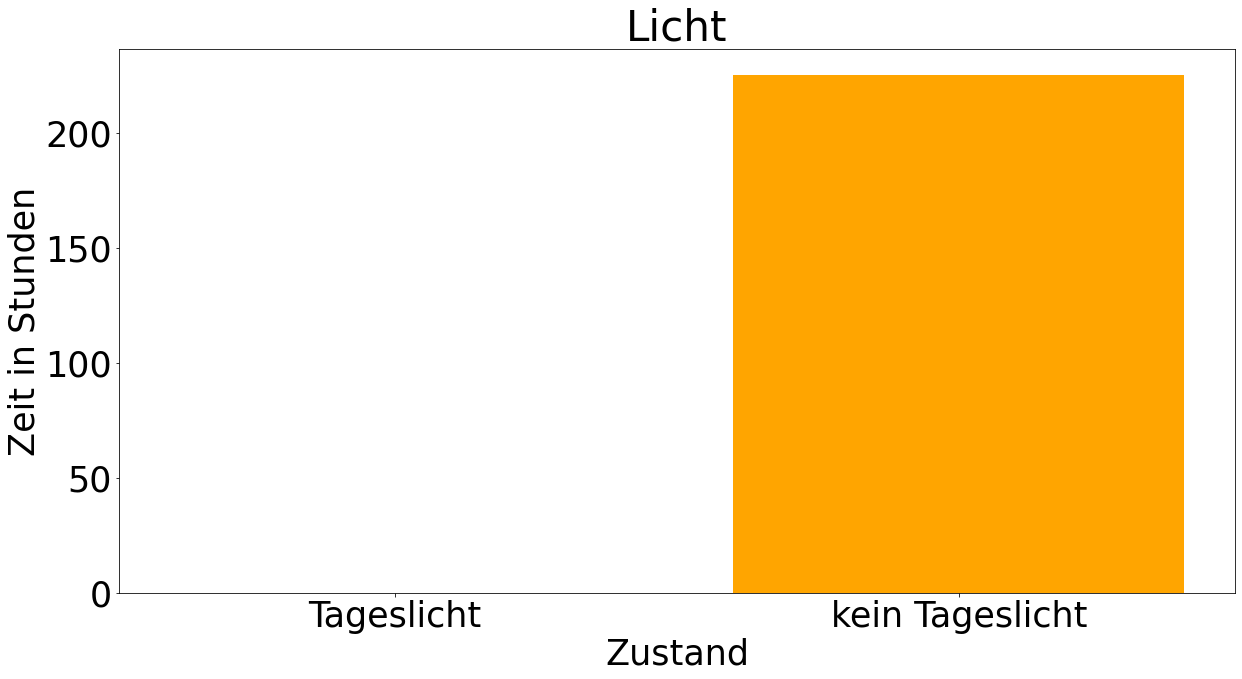

In [68]:
set_state_name('daylight')
lists = retrive_state_and_date_list(data, 'daylight')
od = create_sorted_dict(lists[0], lists[1])
durations = times(od, 'daylight')
labels = ['Tageslicht', 'kein Tageslicht']
plot_pie(durations, labels)
plot_bar(durations, labels, 'Licht', 'Zustand', 'Zeit in Stunden')

### Bewegungssensor

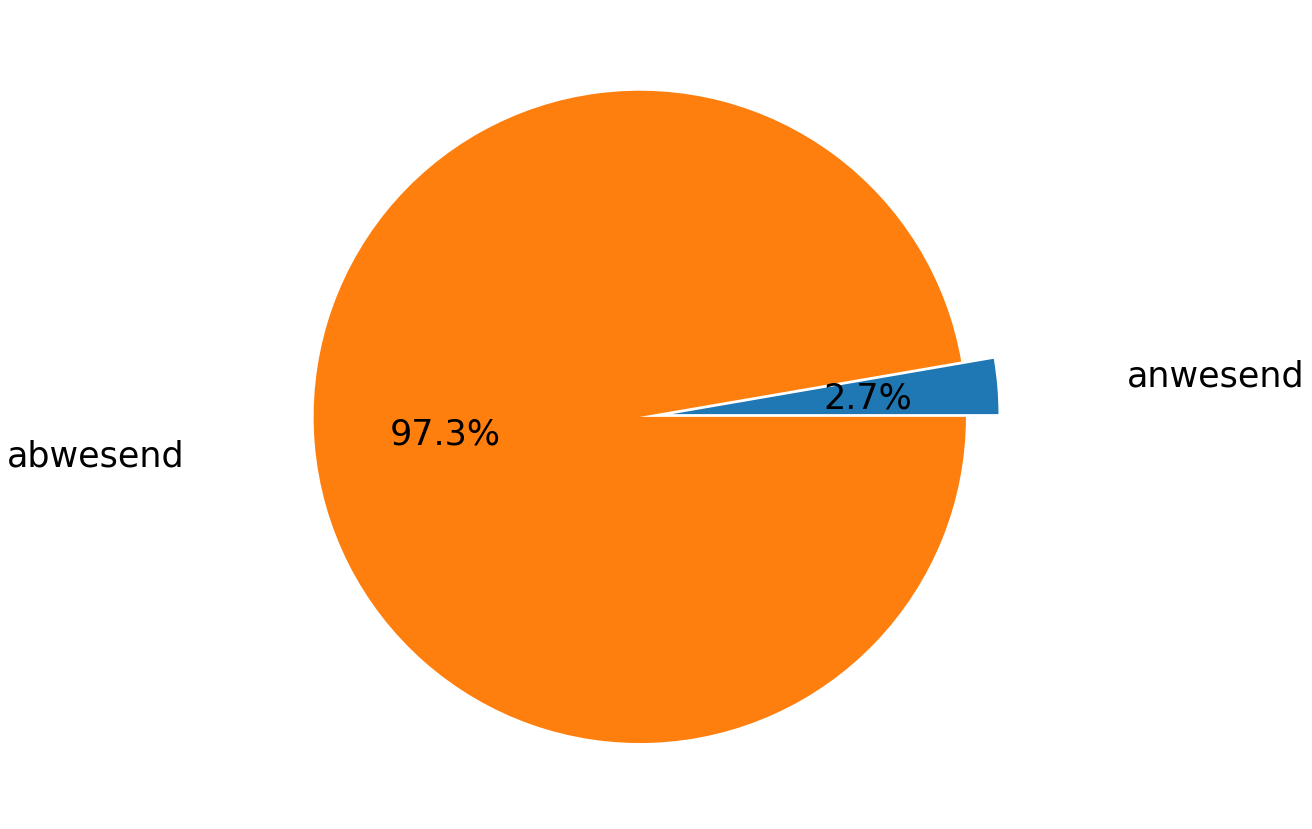

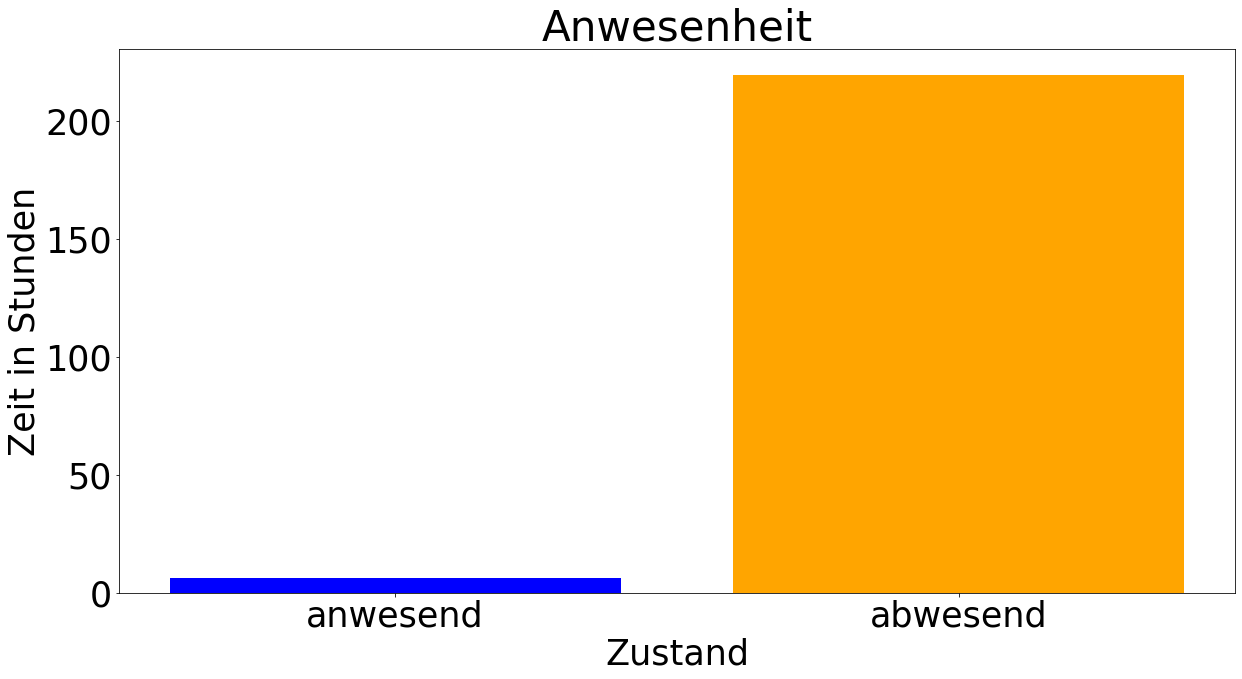

Wie lang war ich in der Küche?
6.12h
Wie lang war ich nicht in der Küche?
219.44h
Wie oft bin ich in der Küche gewesen?
612
Wann war ich das letzte mal in der Küche? (gemessen)
2022-01-16 23:23:29


In [69]:
set_state_name('motion')
data = read_files('motion') # read Json_Files
lists = retrive_state_and_date_list(data, 'newState') #retrive states and dates out of them
od = create_sorted_dict(lists[0], lists[1]) # sort the key value pairs according to the dates
durations = times(od, 'present') # measure durations of the specified state 
labels = ['anwesend', 'abwesend'] 
plot_pie(durations, labels) # plot pia dagram
plot_bar(durations, labels, 'Anwesenheit', 'Zustand', 'Zeit in Stunden') #plot bar diagram


print('Wie lang war ich in der Küche?')
print(str(round(durations[0],2)) + "h")

print('Wie lang war ich nicht in der Küche?')
print(str(round(durations[1],2)) + "h")

print('Wie oft bin ich in der Küche gewesen?')
counter=0
for state in lists[1]:
    if(state == 'present'):
        counter+=1
print(counter)

print('Wann war ich das letzte mal in der Küche? (gemessen)')
print(list(od)[-1])

### Lichtzustandssensor

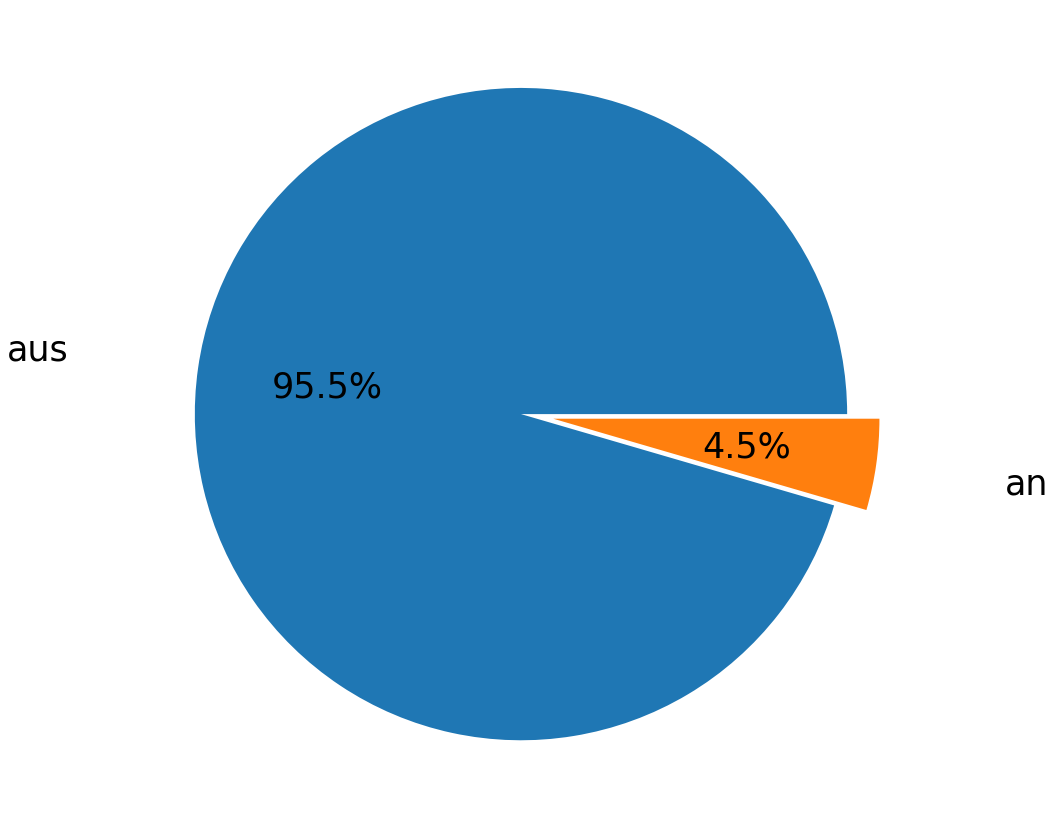

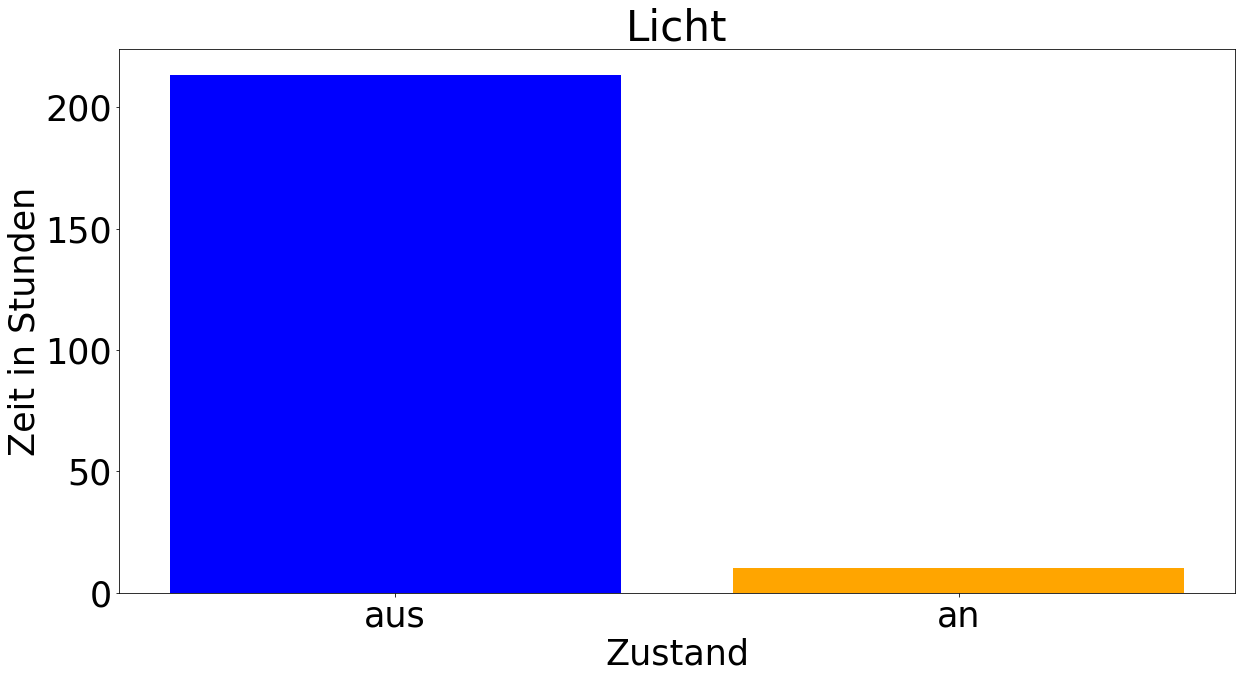

Wie lang war das Licht aus?
213.32h
Wie lang war das Licht an?
10.09h
Wie oft war das Licht an gewesen?
275
Wann war das Licht das letzte mal angewesen? (gemessen)
2022-01-16 23:24:13


In [70]:
set_state_name('lightstate')
data = read_files('lightstate')
lists = retrive_state_and_date_list(data, 'newState')
od = create_sorted_dict(lists[0], lists[1])
labels = ['aus', 'an'] 
durations = times(od, 'off')

plot_pie(durations, labels)
plot_bar(durations, labels, 'Licht', 'Zustand', 'Zeit in Stunden')

print('Wie lang war das Licht aus?')
print(str(round(durations[0],2)) + "h")

print('Wie lang war das Licht an?')
print(str(round(durations[1],2)) + "h")

print('Wie oft war das Licht an gewesen?')
counter=0
for state in lists[1]:
    if(state == 'on'):
        counter+=1
print(counter)

print('Wann war das Licht das letzte mal angewesen? (gemessen)')
print(list(od)[-1])

Um wieviel Minuten wurde der Tag durchschnittlich länger?
1.87 Minuten
Wie lang waren die Tage durchschnittlich?
8.57 Stunden
Wie lang waren die Nächte durchschnittlich?
15.44 Stunden


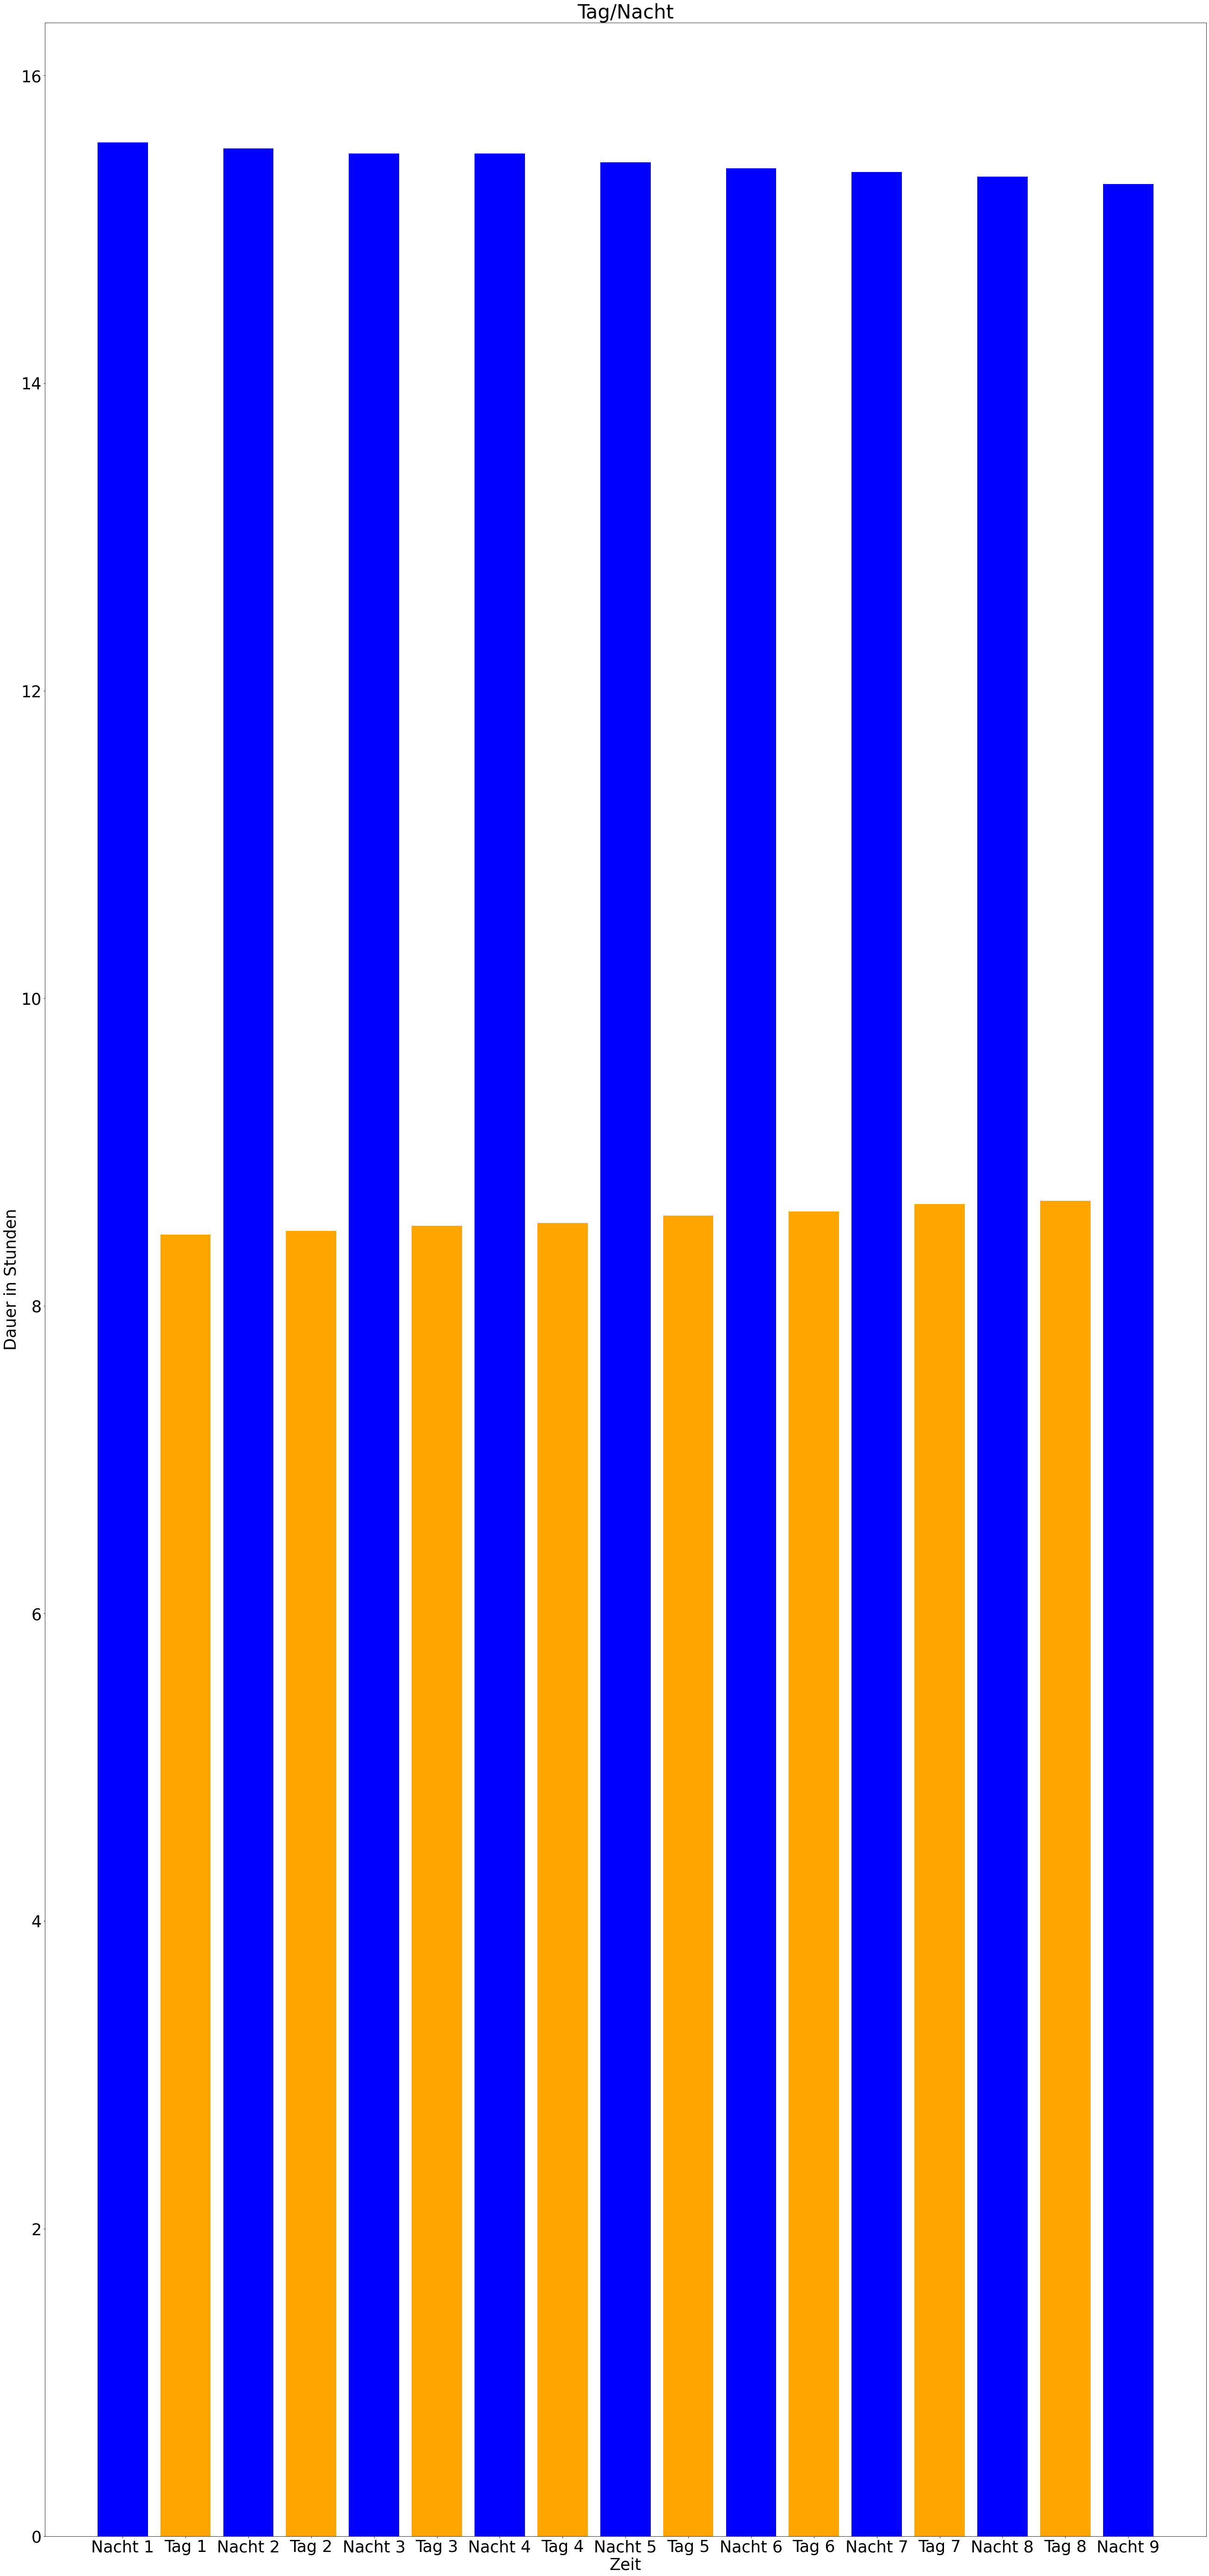

In [71]:
# berechnet die Dauer von Tag und Nacht
def calc_day_night_time(od):
    data = []
    labels = []
    counter_day = 1
    counter_night = 1
    old_date = ""
    for idx, key in enumerate(od):
        
        if(idx == 0): # der erste Wert hat keine vorhergehenden Wert -> kann keine Differenz berechnen
            old_date = key
            continue
        
        # Lampe geht bei Sonnenuntergang an und bei Sonnenaufgang aus
        if(od[old_date] == 'on' and od[key] == 'off'):
            # Lampe an -> Lampe aus = Nacht
            data.append(measure_timediff(old_date, key))
            labels.append("Nacht " + str(counter_night))
            counter_night += 1
        elif(od[old_date] == 'off' and od[key] == 'on'):
            # Lampe aus -> Lampe an = Tag
            data.append(measure_timediff(old_date, key))
            labels.append("Tag " + str(counter_day))
            counter_day += 1
            
        # alle anderen Fälle ignorieren
        old_date = key
    return data, labels

# filtert alle Daten aus der Liste, bei denen im dazugehörigen Label der term vorhanden ist
def filtration(data_list, label_list, term):
    filtered_list = []
    for idx, item in enumerate(data_list):
        if term in label_list[idx]:
            filtered_list.append(item)
    return filtered_list

# ermittelt den Durchschnitt der Verlängerung der Tage in Minuten
def avg_daytime_diff_min(data_list, labels):
    time_list = filtration(data_list, labels, "Tag")
    day_sum = 0
    for idx, day in enumerate(time_list):
        if(idx == 0):
            continue
        day_sum += (day - time_list[idx - 1]) * 60
    return round(day_sum/(len(time_list) - 1), 2) # -1, weil #Differenzen = #Elemente - 1 ist

# ermittelt den Durchschnitt der Länge der Tageszeit in Stunden
def avg_daytime_duration_hours(data_list, labels, term):
    time_list = filtration(data_list, labels, term)
    time_sum = 0
    for idx, time in enumerate(time_list):
        time_sum += time
    return round(time_sum/len(time_list), 2)


set_state_name('sun')
data = read_files('sun')
lists = retrive_state_and_date_list(data, 'newState')
od = create_sorted_dict(lists[0], lists[1])
lists = calc_day_night_time(od)

print("Um wieviel Minuten wurde der Tag durchschnittlich länger?")
print(str(avg_daytime_diff_min(lists[0], lists[1])) + " Minuten")

print("Wie lang waren die Tage durchschnittlich?")
print(str(avg_daytime_duration_hours(lists[0], lists[1], "Tag")) + " Stunden")

print("Wie lang waren die Nächte durchschnittlich?")
print(str(avg_daytime_duration_hours(lists[0], lists[1], "Nacht")) + " Stunden")

plot_bar(lists[0], lists[1], 'Tag/Nacht', 'Zeit', 'Dauer in Stunden', (45, 100))